In [6]:
#Generalized Linear Models 


import pandas as pd

titanic=pd.read_csv('titanic.csv')
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [10]:
titanic_sub=(
    titanic[["survived","sex","age","embarked"]].copy().dropna()
)
print(titanic_sub)

     survived     sex   age embarked
0           0    male  22.0        S
1           1  female  38.0        C
2           1  female  26.0        S
3           1  female  35.0        S
4           0    male  35.0        S
..        ...     ...   ...      ...
885         0  female  39.0        Q
886         0    male  27.0        S
887         1  female  19.0        S
889         1    male  26.0        C
890         0    male  32.0        Q

[712 rows x 4 columns]


In [12]:
#count of values in the survived column 0-dead, 1-survived

print(titanic_sub["survived"].value_counts())

survived
0    424
1    288
Name: count, dtype: int64


In [16]:
#embarked - where they boarded titanic , Southhapmptom S, 
print(titanic_sub["embarked"].value_counts())
      

embarked
S    554
C    130
Q     28
Name: count, dtype: int64


In [ ]:
# The Link Function
#  logit(p) = LOG (p/ 1-p)

# p/(1-p)  is the odds of the event, the odds can only be greater than 0, 
# and it can never be negative

In [19]:
import statsmodels.formula.api as smf
#formula for the model
form ='survived~sex+age+embarked'
#fitting the logistic regression model

py_logistic_smf=smf.logit(formula =form, data=titanic_sub).fit()
print(py_logistic_smf.summary())


Optimization terminated successfully.
         Current function value: 0.509889
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Thu, 27 Mar 2025   Pseudo R-squ.:                  0.2444
Time:                        20:42:09   Log-Likelihood:                -363.04
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.209e-49
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.2046      0.322      6.851      0.000       1.574       2.835
sex[T.male]      -2.

In [21]:
import numpy as np

#get the coeff in a DF 

res_sm=pd.DataFrame(py_logistic_smf.params,columns=["coefs_sm"])

#calculate the odds
res_sm["odds_sm"]=np.exp(res_sm["coefs_sm"])

#round the decimals
print(res_sm.round(3))

               coefs_sm  odds_sm
Intercept         2.205    9.066
sex[T.male]      -2.476    0.084
embarked[T.Q]    -1.816    0.163
embarked[T.S]    -1.007    0.365
age              -0.008    0.992


In [23]:
titanic_dummy= pd.get_dummies(
    titanic_sub[["survived","sex","age","embarked"]],
    drop_first=True
)
print(titanic_dummy)

     survived   age  sex_male  embarked_Q  embarked_S
0           0  22.0      True       False        True
1           1  38.0     False       False       False
2           1  26.0     False       False        True
3           1  35.0     False       False        True
4           0  35.0      True       False        True
..        ...   ...       ...         ...         ...
885         0  39.0     False        True       False
886         0  27.0      True       False        True
887         1  19.0     False       False        True
889         1  26.0      True       False       False
890         0  32.0      True        True       False

[712 rows x 5 columns]


In [27]:
from sklearn import linear_model

py_logistic_sklearn1=(
    linear_model.LogisticRegression().fit(
        X=titanic_dummy.iloc[:,1:], #all columns expect 1st
        y=titanic_dummy.iloc[:,0] #just the 1st column
    )
)

#get the names of dummy variable 
dummy_names= titanic_dummy.columns.to_list()

#get the intercept and coef into a df

sk1_res1=pd.DataFrame(
    py_logistic_sklearn1.intercept_,
    index=["Intercept"],
    columns=["coef_sk1"],
)
sk1_res2=pd.DataFrame(
    py_logistic_sklearn1.coef_.T,
    index=dummy_names[1:],
    columns=["coef_sk1"],
)

#put the results into a 1 DF to show the results

res_sklearn_pd_1=pd.concat([sk1_res1,sk1_res2])
#calculate the odds
res_sklearn_pd_1["odds_sk1"]=np.exp(res_sklearn_pd_1["coef_sk1"])
print(res_sklearn_pd_1.round(3))

            coef_sk1  odds_sk1
Intercept      2.024     7.568
age           -0.008     0.992
sex_male      -2.371     0.093
embarked_Q    -1.368     0.255
embarked_S    -0.887     0.412


In [29]:
#POISSON Regression is performed when the respose variable involves count data

acs=pd.read_csv('acs_ny.csv')
print(acs.columns)


Index(['Acres', 'FamilyIncome', 'FamilyType', 'NumBedrooms', 'NumChildren',
       'NumPeople', 'NumRooms', 'NumUnits', 'NumVehicles', 'NumWorkers',
       'OwnRent', 'YearBuilt', 'HouseCosts', 'ElectricBill', 'FoodStamp',
       'HeatingFuel', 'Insurance', 'Language'],
      dtype='object')


In [31]:
#Numchildren example of count data
print(acs["NumChildren"])

0        1
1        2
2        0
3        1
4        1
        ..
22740    3
22741    0
22742    1
22743    2
22744    2
Name: NumChildren, Length: 22745, dtype: int64


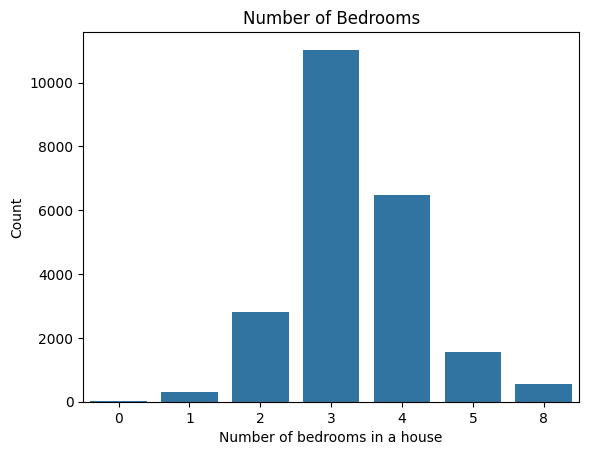

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax=plt.subplots()
sns.countplot(data=acs,x="NumBedrooms",ax=ax)
ax.set_title('Number of Bedrooms')
ax.set_xlabel('Number of bedrooms in a house')
ax.set_ylabel('Count')
plt.show()

In [35]:
model=smf.poisson(
    "NumBedrooms~HouseCosts+OwnRent",data=acs
)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 1.680998
         Iterations 10
                          Poisson Regression Results                          
Dep. Variable:            NumBedrooms   No. Observations:                22745
Model:                        Poisson   Df Residuals:                    22741
Method:                           MLE   Df Model:                            3
Date:                Thu, 27 Mar 2025   Pseudo R-squ.:                0.008309
Time:                        21:07:13   Log-Likelihood:                -38234.
converged:                       True   LL-Null:                       -38555.
Covariance Type:            nonrobust   LLR p-value:                1.512e-138
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1387      0.006    184.928      0.000       1.127       1.151
O

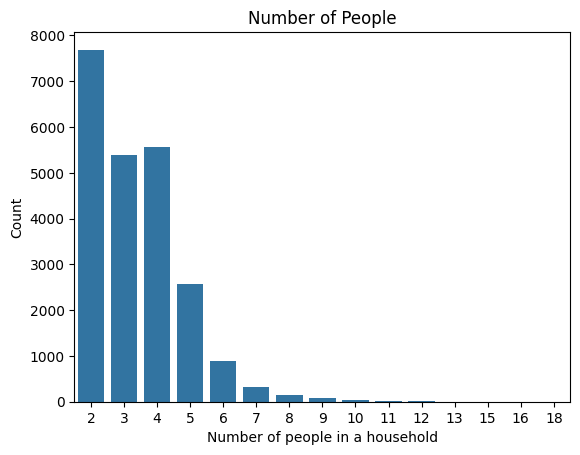

In [39]:
fig,ax=plt.subplots()
sns.countplot(data=acs, x="NumPeople", ax=ax)
ax.set_title('Number of People')
ax.set_xlabel('Number of people in a household')
ax.set_ylabel('Count')
plt.show()

In [49]:
import statsmodels.api as sm
from statsmodels.genmod import families

model = smf.glm(
    "NumPeople~Acres+NumVehicles",
    data=acs,
    family=sm.families.NegativeBinomial(
        sm.genmod.families.links.log()
    ),
)
results =model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              NumPeople   No. Observations:                22745
Model:                            GLM   Df Residuals:                    22741
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53542.
Date:                Thu, 27 Mar 2025   Deviance:                       2605.6
Time:                        21:13:12   Pearson chi2:                 2.99e+03
No. Iterations:                     6   Pseudo R-squ. (CS):           0.003504
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0418      0.025     41.

/Users/Deep/venv/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/Users/Deep/venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [55]:
print(acs["Acres"].unique())

['1-10' 'Sub 1' '10+']
